In [1]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
import gc

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Unzip the dataset (run only once)
import zipfile
import os

zip_path = '/content/drive/MyDrive/DL_Dataset/old_dataset.zip'
extract_path = '/content/dataset'

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


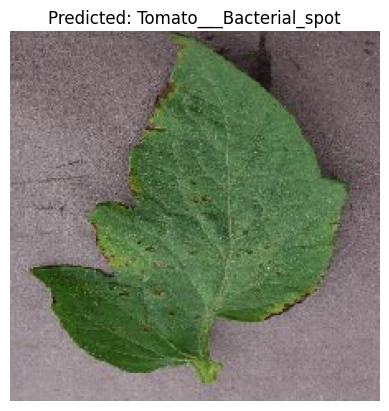

In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 2. Load your trained model
model_path = '/content/drive/MyDrive/Colab Notebooks/VGG16.h5'  # update this
model = load_model(model_path)

# 3. Define the class labels
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# 4. Image path from Google Drive
img_path = '/content/drive/MyDrive/DL_Dataset/Testing/BacterialSpot/img3.jpg'

# 5. Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)

# 6. Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# 7. Display
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()